# Model Project: AD-AS Model

Imports and set magics:

In [56]:
import numpy as np
from scipy import optimize
from sympy import symbols, Eq, solve
%load_ext autoreload
%autoreload 2
import modelproject
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

\begin{align}
y_t - \bar{y} &= \beta_1 \left( e_{t-1}^{r} + \pi^{f} - \pi_t \right) - \beta_2 \left( i^{f} - \pi_{t+1}^{e} - r^{f} \right) + \tilde{z}t, \quad \\
\tilde{z}t &\equiv \beta_3 \left( g_t - \bar{g} \right) \\
g_t - \bar{g} &= a \left( \bar{y} - y_t \right), \quad  \\
\pi_t &= \pi_t^{e} + \gamma \left( y_t - \bar{y} \right) + s_t, \quad \\
s_t &= s_{t-1}+N(0,1) \\
e_{t}^{r} &= e_{t-1}^{r} + \pi^{f} - \pi_t, \quad
\end{align}



The Aggregate Demand and Aggregate Supply (AD-AS) model model is a way of illustrating national income determination and changes in the price level. We can use this to illustrate phases of the business cycle and how different events can lead to changes in two of our key macroeconomic indicators: real GDP and inflation.
(1) is the AD function, (2) is shocks from government spending, (3) is the government spending reaction function, (4) defines the inflation in the economy, (5) is the stochastic shock evolution to inflation and (6) defines the dynamics of the real exchange rate

## Analytical solution

To initiate the analysis of the AD-AS model with start by solving a simple model excluding demand shocks and focusing on the solution given chosen parameters. This approach allows us to isolate and understand the core mechanisms without additional complexities introduced by external fluctuations. Afterwards in our analysis we will investigate how a change in parameters affect the model. 
The model is initialized with the following parameter values:

- **Beta coefficients (β1, β2, β3)**: These parameters, set at 10, 1, and 0.1 respectively, influence the responsiveness of the aggregate demand to economic factors such as exchange rates and interest rates, and the impact of fiscal policy.
- **Gamma (γ)**: At a value of 0.05, this parameter dictates the degree to which output gaps influence inflation, representing the sensitivity of inflation to economic activity.
- **Parameter a**: Set at 0.2, this parameter governs the fiscal policy's responsiveness to deviations from potential output.
- **Inflation rates**: Expected domestic inflation is set at 2%, with foreign inflation held at 0%, creating a differential that impacts exchange and interest rate dynamics.
- **Interest rates**: Both foreign interest and real interest rates are set at 2%, providing a baseline for assessing monetary policy effects under equilibrium conditions.
- **Previous exchange rate**: Established at 2, this value sets a baseline for evaluating adjustments in response to inflation differentials.
- **Potential output (Ȳ)**: Defined at 100, this represents the economy’s capacity at full employment without overheating.
- **Delta (δ)**: At 0.1, this parameter controls the persistence of the stochastic shock in the supply equation, set to minimal impact for this initial analysis.

#### Reviewing the AD Curve:

The Aggregate Demand (AD) curve is defined as:

$$
y_t = \bar{y} + \frac{\beta_1}{1 + \beta_3 a} \left(e_{t-1}^r + \pi^f - \pi_t\right) - \frac{\beta_2}{1 + \beta_3 a} \left(i^f - \pi_{t+1}^e - r^f\right)
$$

To explore the specific impact of these parameters, let's further assume:
- $\pi^f = 0$, indicating no foreign inflation pressure,
- $\pi_{t+1}^e = \pi_t = \pi$, where $\pi$ is the general level of domestic inflation,
- $i^f = r^f = i$, simplifying the interest rate environment to be neutral in terms of real returns.

Under these assumptions, the AD equation can be rewritten as:

$$
y_t = \bar{y} + \frac{\beta_1}{1 + \beta_3 a} \left(e_{t-1}^r - \pi\right) + \frac{\beta_2}{1 + \beta_3 a} \pi
$$

This formulation clearly presents the influence of each parameter on the aggregate demand curve, highlighting the economic mechanisms at play.

#### Reviewing the AD Curve:
The Aggregate Supply (AS) curve is defined in equation (4) 
$$
\pi_t=\pi+\gamma (y_t-\bar{y_t})
$$

#### Solving the model analytically with SymPy

In [57]:
from sympy import symbols, Eq, solve

# Define symbols
y_t, pi_t = symbols('y_t pi_t', real=True)

# Constants
bar_y = 100
beta1 = 10
beta2 = 1
beta3 = 0.1
gamma = 0.05
a = 0.2
pi_f = 0
i_f = 2
r_f = 2
e_r = 2
pi_e = 2  # Expected inflation

# Calculate AD adjustment factor
adjustment_factor = 1 + beta3 * a

# AD and SRAS equations
AD = bar_y + (beta1/adjustment_factor) * (e_r + pi_f - pi_t) - (beta2/adjustment_factor) * (i_f - pi_e - r_f)
SRAS = pi_e + gamma * (y_t - bar_y)

# Solve the system
solution = solve((Eq(y_t, AD), Eq(pi_t, SRAS)), (y_t, pi_t))
solution

print('The solution to the model is: ', solution, 'which is very close to the expected values of y_t = 100 and pi_t = 2.00.')


The solution to the model is:  {pi_t: 2.06578947368420, y_t: 101.315789473684} which is very close to the expected values of y_t = 100 and pi_t = 2.00.


### Illustration of the analytical solution: 

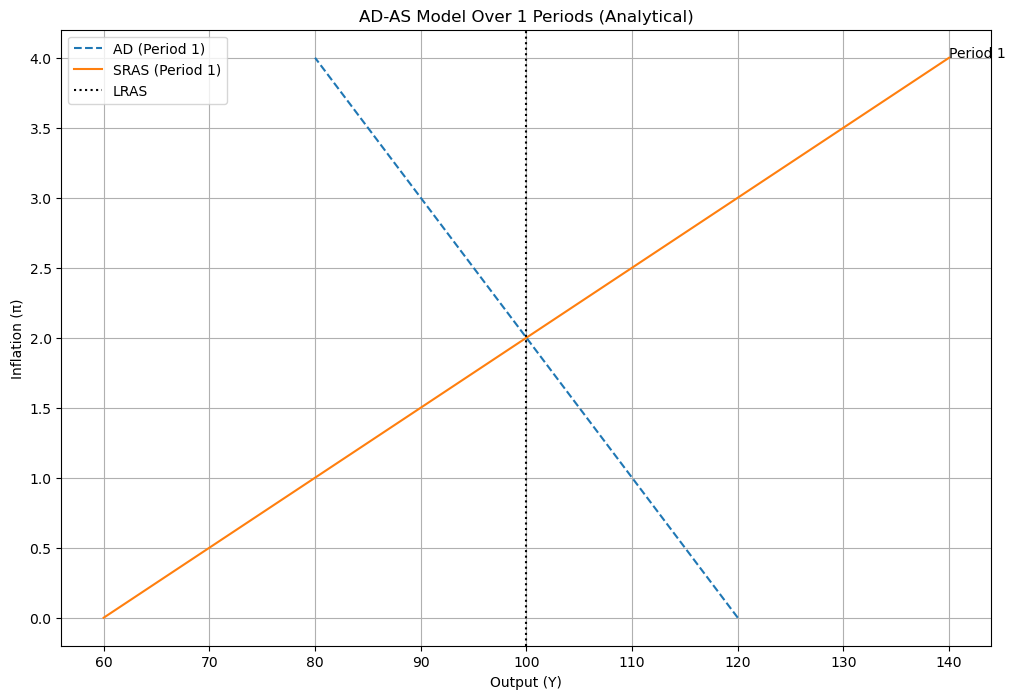

Analytical Intersection Point at Period 1: {inflation: 2.00000000000000, output: 100.000000000000}


In [79]:
#Import the model
from modelproject import ADASModel
#Define parameters
model = ADASModel(
    beta1=10, beta2=1, beta3=0.1, gamma=0.05, a=0.2, expected_inflation=2, foreign_inflation=0,
    foreign_interest_rate=2, foreign_real_interest_rate=2, previous_exchange_rate=2, potential_output=100,
    delta=0.1, demand_shock=0
)

# Set the initial values for the model
model.s_t = 0
model.update_normal_distribution = False  # Disable normal distribution updates

# Set the number of periods for the analytical solution
num_periods = 1

# Plot and find the analytical solution after 1 periods with s_t remaining at zero
intersection_analytical = model.plot_graphs_all_periods_analytical(num_periods)

# Print the analytical intersection point at period 10
print(f"Analytical Intersection Point at Period {num_periods}: {intersection_analytical}")


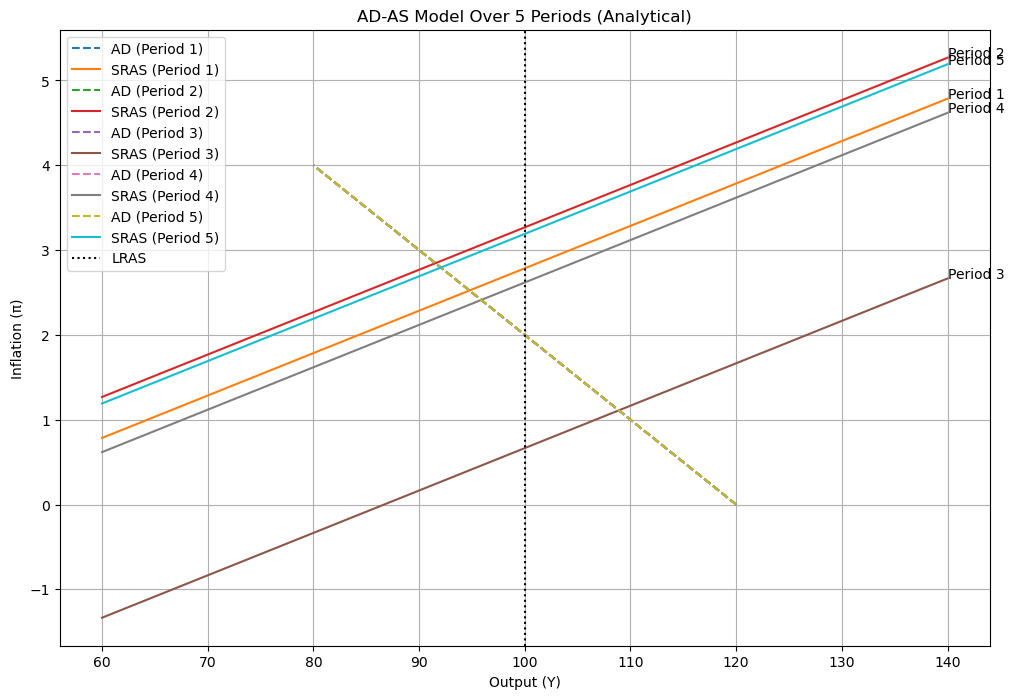

Analytical Intersection Point at Period 5: {inflation: 2.79401469914567, output: 92.0598530085433}


In [78]:
# Enable the normal distribution updates for future calculations
model.update_normal_distribution = True

# Set the number of periods for the analytical solution
num_periods = 5

# Plot and find the analytical solution after enabling normal distribution updates
intersection_analytical = model.plot_graphs_all_periods_analytical(num_periods)

# Print the analytical intersection point at period 10
print(f"Analytical Intersection Point at Period {num_periods}: {intersection_analytical}")


Now the stochastic part of the supply shock is set to be a normal distribution with the mean of 0 and varaince of 1.

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

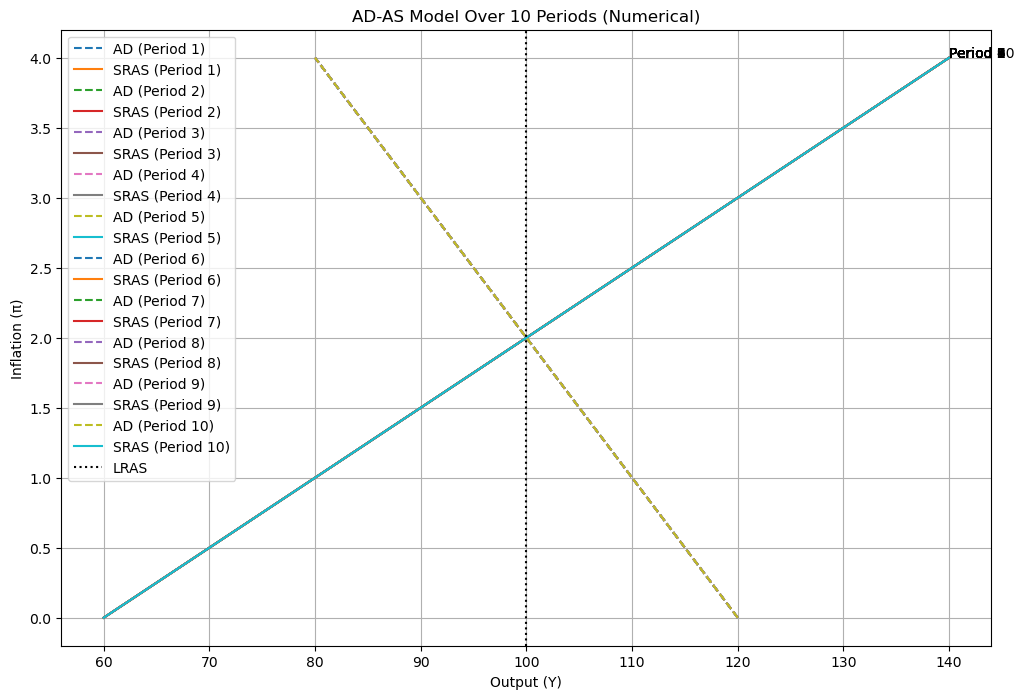

Numerical Intersection Point at Period 10: [100.   2.]


In [77]:
# Initialize the model with no demand shock initially
model = ADASModel(
    beta1=10, beta2=1, beta3=0.1, gamma=0.05, a=0.2, expected_inflation=2, foreign_inflation=0,
    foreign_interest_rate=2, foreign_real_interest_rate=2, previous_exchange_rate=2, potential_output=100,
    delta=0.1, demand_shock=0  # Start without a demand shock
)

# Ensure that s_t remains zero for all periods
model.s_t = 0
model.update_normal_distribution = False  # Disable normal distribution updates

# Define the initial guess for the numerical solution
initial_guess = [100, 2]

# Set the number of periods for the numerical solution
num_periods = 10

# Plot and find the numerical solution after 10 periods with s_t remaining at zero
intersection_numerical = model.plot_graphs_all_periods_numerical(num_periods, initial_guess)

# Print the numerical intersection point at period 10
print(f"Numerical Intersection Point at Period {num_periods}: {intersection_numerical}")


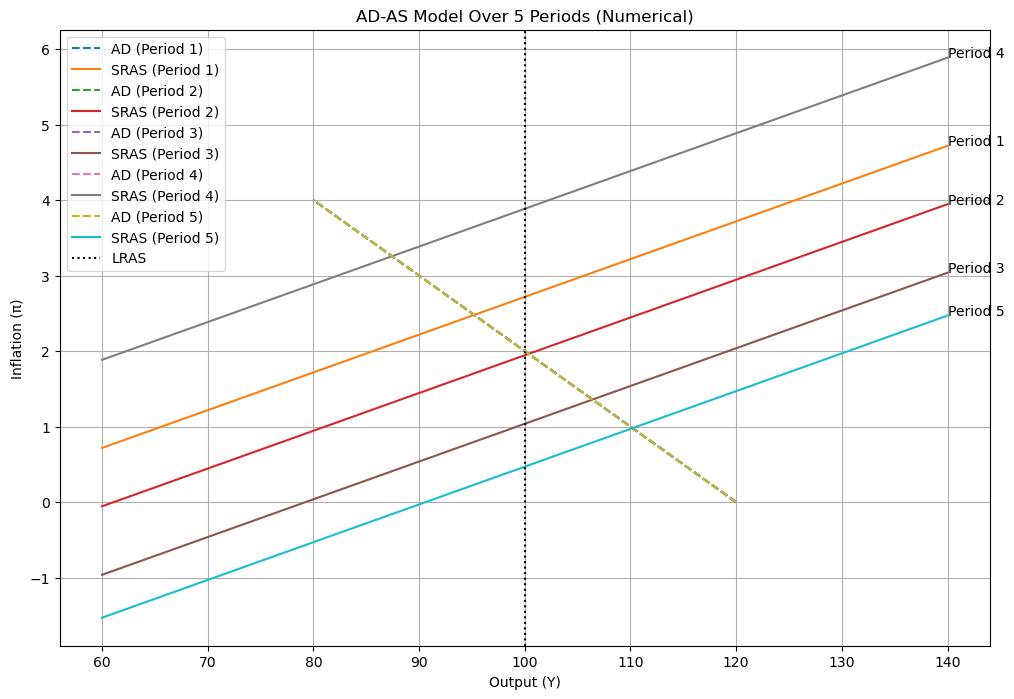

Numerical Intersection Point at Period 5: [110.20039982   0.97995954]


In [66]:
# Enable the normal distribution updates for future calculations
model.update_normal_distribution = True

# Define the initial guess for the numerical solution
initial_guess = [100, 2]

# Set the number of periods for the numerical solution
num_periods = 5

# Plot and find the numerical solution after enabling normal distribution updates
intersection_numerical = model.plot_graphs_all_periods_numerical(num_periods, initial_guess)

# Print the numerical intersection point at period 10
print(f"Numerical Intersection Point at Period {num_periods}: {intersection_numerical}")


# Further analysis

We now make an extenstion of the model where we are introducing a demand shock!


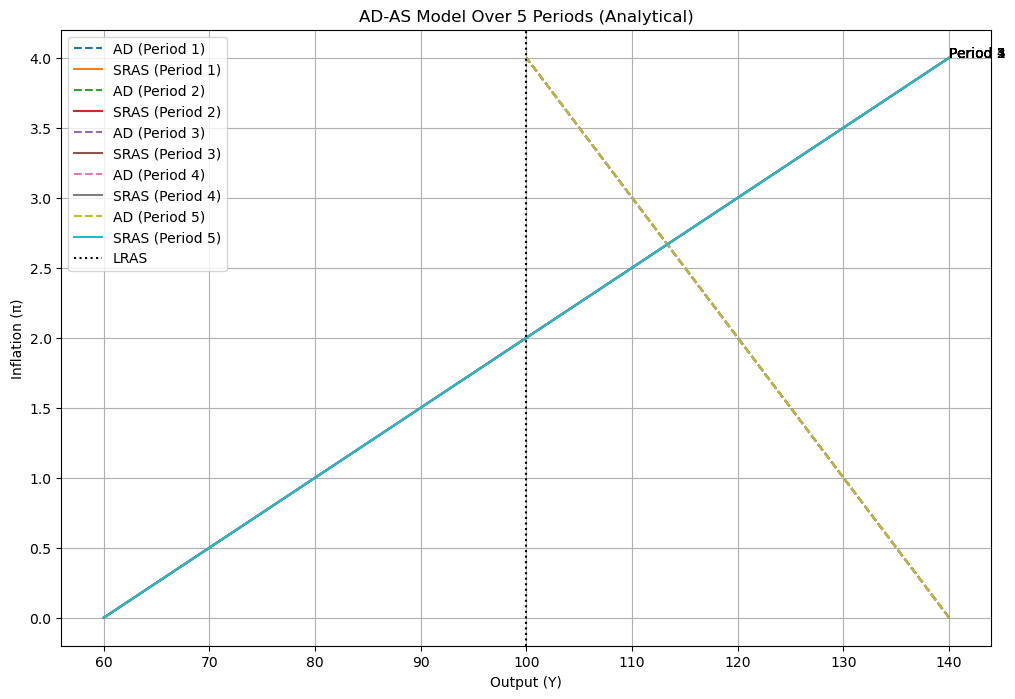

Analytical Intersection Point at Period 5: {inflation: 2.66666666666667, output: 113.333333333333}


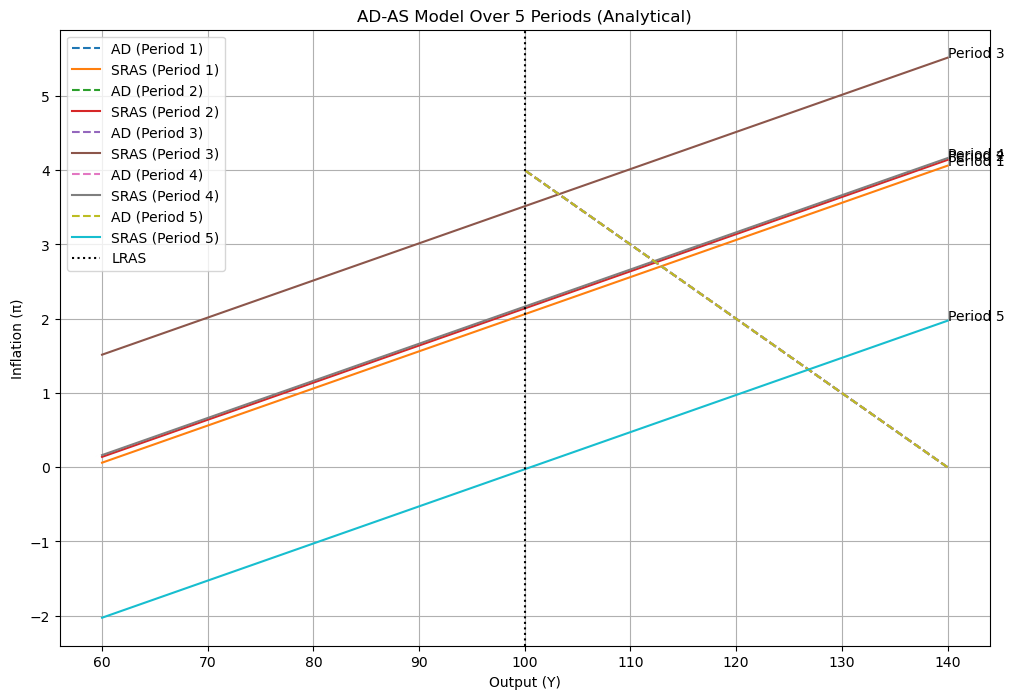

Analytical Intersection Point at Period 5 with Normal Distribution: {inflation: 1.31541472350404, output: 126.845852764960}


In [68]:
# Initialize the model with a demand shock of 20
model = ADASModel(
    beta1=10, beta2=1, beta3=0.1, gamma=0.05, a=0.2, expected_inflation=2, foreign_inflation=0,
    foreign_interest_rate=2, foreign_real_interest_rate=2, previous_exchange_rate=2, potential_output=100,
    delta=0.1, demand_shock=0  # Introduce a significant demand shock
)

model.s_t = 0
model.update_normal_distribution = False  # Disable normal distribution updates

model.demand_shock = 20  # Set the demand shock to 20

# Set the number of periods for the analytical solution
num_periods = 5

# Plot and find the analytical solution over the given number of periods
intersection_analytical = model.plot_graphs_all_periods_analytical(num_periods)

# Print the analytical intersection point at the final period
print(f"Analytical Intersection Point at Period {num_periods}: {intersection_analytical}")

# Enable normal distribution updates for the following iterations
model.update_normal_distribution = True

# Plot again after enabling normal distribution updates
intersection_analytical = model.plot_graphs_all_periods_analytical(num_periods)

# Print the analytical intersection point at the final period with normal distribution
print(f"Analytical Intersection Point at Period {num_periods} with Normal Distribution: {intersection_analytical}")


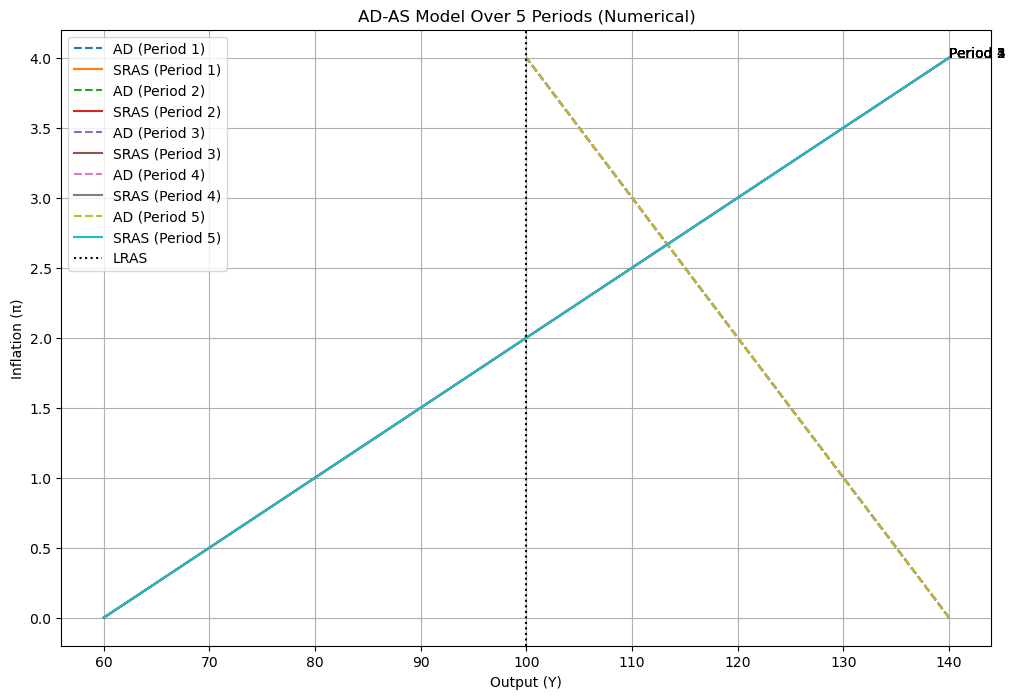

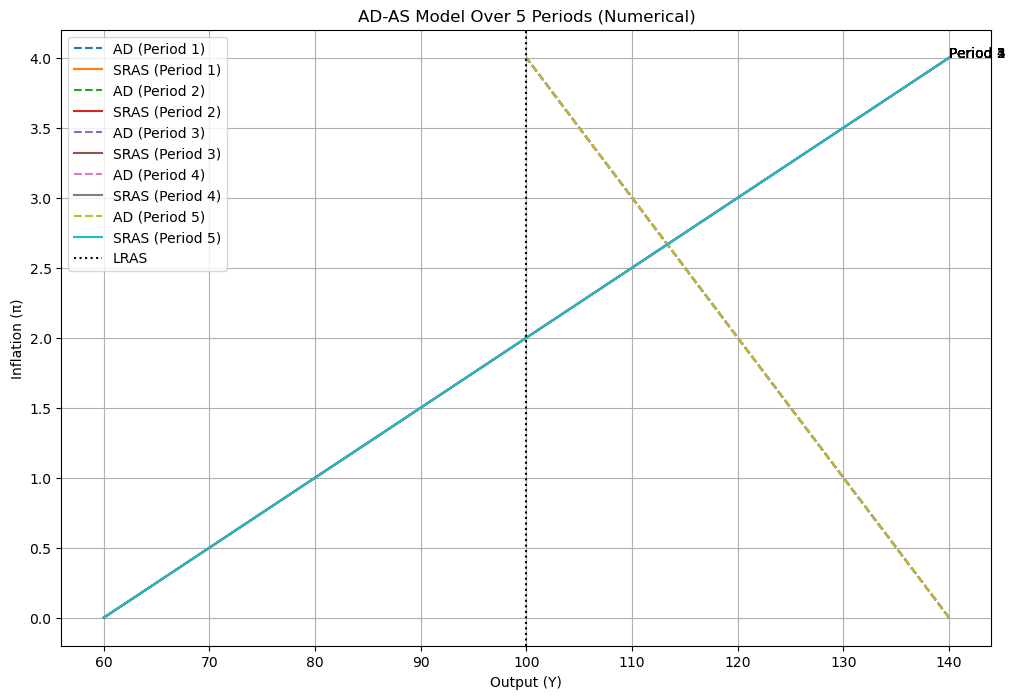

Numerical Intersection Point at Period 5: [113.33337273   2.66666306]


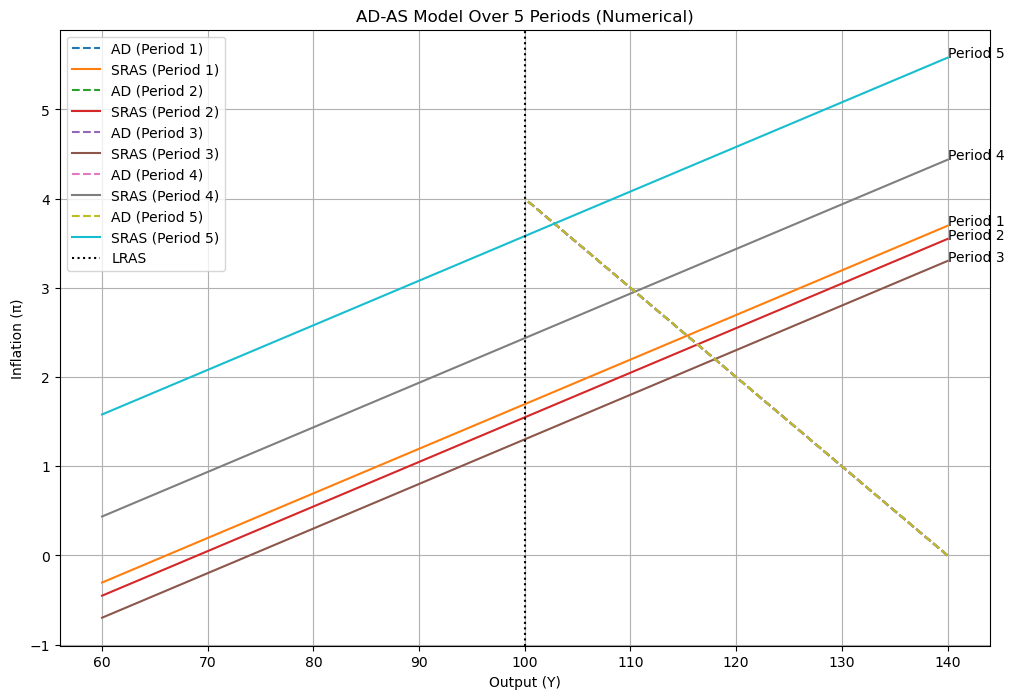

Numerical Intersection Point at Period 5 with Normal Distribution: [102.79779647   3.72022051]


In [81]:
# Initialize the model with a demand shock of 0
model = ADASModel(
    beta1=10, beta2=1, beta3=0.1, gamma=0.05, a=0.2, expected_inflation=2, foreign_inflation=0,
    foreign_interest_rate=2, foreign_real_interest_rate=2, previous_exchange_rate=2, potential_output=100,
    delta=0.1, demand_shock=0  # Introduce a significant demand shock
)

# Ensure that s_t remains zero for all periods
model.s_t = 0
model.update_normal_distribution = False  # Disable normal distribution updates

model.demand_shock = 20  # Set the demand shock to 20

# Define the initial guess for the numerical solution
initial_guess = [60, 1]

# Set the number of periods for the numerical solution
num_periods = 5

# Plot and find the numerical solution over the given number of periods
intersection_numerical = model.plot_graphs_all_periods_numerical(num_periods, initial_guess)
model.plot_graphs_all_periods_numerical(num_periods, initial_guess)
# Print the numerical intersection point at the final period
print(f"Numerical Intersection Point at Period {num_periods}: {intersection_numerical}")

# Enable normal distribution updates for the following iterations
model.update_normal_distribution = True

# Plot again after enabling normal distribution updates
intersection_numerical = model.plot_graphs_all_periods_numerical(num_periods, initial_guess)

# Print the numerical intersection point at the final period with normal distribution
print(f"Numerical Intersection Point at Period {num_periods} with Normal Distribution: {intersection_numerical}")


# Conclusion

In this project we have made a model for the AD-AS model and shown how it reacts to a stochastic shock in the SRAS and how the AD curve moves following a demand shock. First we solve the model analytically and then we make a numerical optimization 

Note: We still have some problems with the AD curve not moving for each period, we are still trying to fix this and will be uploading an updated version 